# **AMAZON BUY BOX** 

There are many different vendors that sell the same product for different prices on Amazon. However, there are only 3 different vendor types. The first vendor type is Amazon themselves. The second vendor type is called FBA; FBA vendors are 3rd party vendors that use Amazon's warehouse and fulfillment service to fullfill orders (they have to pay Amazon for this service). And the third vendor type is called Other; Other vendors are 3rd party vendors that list there products on Amazon but fulfill their own orders from their own facilities. Amazon's algorithm will order the product listings so that the listing with the lowest price will be ranked number one and appear first. In addition to this ranking system, Amazon has what is known as the "buy box". The buy box appears as the very first listing for a product, even before the number one ranked listing. The very first listing to appear for a product has a significantly higher percentage of selling than the rest. Amazon says that their algorithm takes more than just the price in to consideration when determining which listing will win the buy box. Some examples they give are lead time and stock availabilty, but they will not disclose everything because it is their own proprietary algorithm. This means that a listing with a higher price than the number one ranked listing can win the buy box. After some analysis of the data, it seems Amazon's buy box algorithm takes the vendor type heavily in to consideration. It seems Amazon's algorithm significantly favors its own listings, and listings from FBA vendors, over the Other vendors that do no use Amazon's FBA service. Since a 3rd party vendor has no option to become Amazon, my questions and comparisons will focus between FBA vendors and Other vendors.

## `Hypothesis:`

#### For 3rd party vendors that are selling products in the Amazon online marketplace, their product listings will have a better chance of winning the buy box if they subscribe to the "Fulfilled By Amazon" service (FBA). 

#### This is because Amazon's algorithm gives FBA vendors a better chance to win the buy box over non FBA vendors.

## `Goals and success metrics:`

#### I want to compare the FBA vendor type with the Other vendor type to see if there is a higher chance to win the buy box just by being an FBA vendor type. Some questions I will answer are:  
    - How many number one rankings were achieved by each vendor type?
    - How many times did each vendor type win the buy box?
    - How many times did the Other vendor type win the buy box there was an Amazon or FBA vendor selling the same product?
    - How many times did each vendor type win the buy box without ranking number 1?
    - Overall, how many times did the number 1 ranked vendor win the buy box?
   
#### We can assume that an FBA vendor has a higher chance to win the buy box over an Other vendor if the following are true:
    - There are more instances where an FBA vendor wins the buy box when they are not ranked number 1 as compared to when an Other vendor wins the buy box when they are not ranked number 1.
    - There are more instances where an FBA vendor wins the buy box when they are ranked number 1 as compared to when an 
    Other vendor wins the buy box when they are ranked number 1.

#### I will also train a Logistic Regression Model and a Random Forest Model to predict if an FBA or Other vendor type will win the buy box for a product based on the number one ranked vendor type for that product and if an FBA vendor is selling that product. I will compare the results from the 2 different models. 
    

## `Risks and limitations:`

    - I only have data from a few weeks and for only 250 different products. The dataset is small.
        - I will make use of sampling to increase the dataset to improve our models.

    - Amazon.com's and FBA vendor's shipping costs only apply to non Prime members with an order total below $45. 
        - The majority of Amazon users are Prime members. In 2022, 58% of all households in USA are Prime members 
        (76.6 million out of 131.2 million). For the purposes of this project, I will assume everyone is a prime member 
        and remove the columns with data relevant to non prime users.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Allow plots to appear in the notebook.
%matplotlib inline

In [2]:
# suppress warnings 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# load the Amazon data set 
df = pd.read_csv('./09-19-Amazon-Ranking-Analysis.csv')

# show the first 5 rows
df.head()

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,2,2,1,20.99,20.99,Supplement Warriors,Other,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,1,1,1,3.96,3.96,speedy tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,2,1,1,3.96,3.96,Drug Abuse Control,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97


## `EDA:`

#### I reviewed the Amazon csv file and noticed that the categories in the BBVendorType column are Amazon, FBA, and O whereas the categories in the the ScrapedIndexVendorType column are Amazon, FBA, and Other. I will rename all the 'O' values in the BBVendorType column to 'Other' so that the values in both columns match.

In [4]:
# Rename all the 'O' values in the BBVendorType column to 'Other'. 
df.loc[df['BBVendorType'] == 'O', 'BBVendorType'] = 'Other'

In [5]:
# Confirm that the vendor type categories now match in both columns. 
print(df['BBVendorType'].unique())
print(df['ScrapedIndexVendorType'].unique())

['FBA' 'Other' 'Amazon']
['Other' 'FBA' 'Amazon']


The vendor categories now match in both columns BBVendorType and ScrapedIndexVendorType

In [6]:
# check the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6973 entries, 0 to 6972
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   6973 non-null   int64  
 1   ProductName             6973 non-null   object 
 2   ScrapeDate              6973 non-null   object 
 3   ScrapedIndex            6973 non-null   int64  
 4   ScrapedIndexTrueRank    6973 non-null   int64  
 5   CorrectedIndexTrueRank  6973 non-null   int64  
 6   ScrapedIndexPrice       6973 non-null   float64
 7   CorrectedPrice          6973 non-null   float64
 8   ScrapedIndexVendor      6973 non-null   object 
 9   ScrapedIndexVendorType  6973 non-null   object 
 10  BBScrapedPrice          6973 non-null   float64
 11  BBVendorType            6973 non-null   object 
 12  BBVendor                6809 non-null   object 
 13  BBCorrectedPrice        6973 non-null   float64
dtypes: float64(4), int64(4), object(6)
memor

    - There are 6973 rows and 14 columns in the dataframe.
    - The data types are float (4 columns), int (4 columns), and object (6 columns).
    - There are 164 rows with null values in the BBVendor column.

In [7]:
# view some rows with null values
df[df.isna().any(axis=1)].head()

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
19,19,2wayz FULL METAL BODY Garden Hose Splitter | Y...,2016-06-20,1,1,1,40.00,40.00,Irtenzia,Other,-1.0,Other,NaN,9.97
20,20,2wayz FULL METAL BODY Garden Hose Splitter | Y...,2016-06-20,2,2,2,54.94,54.94,Mild Shop,Other,-1.0,Other,NaN,9.97
1367,1367,Bushnell Powerview 7-15X25 Compact Zoom Binocular,2016-08-30,1,1,1,53.04,53.04,PORTABLE GUY,Other,-1.0,Other,NaN,165.50
1368,1368,Bushnell Powerview 7-15X25 Compact Zoom Binocular,2016-08-30,2,2,2,54.41,54.41,TheXBOXking,Other,-1.0,Other,NaN,165.50
1369,1369,Bushnell Powerview 7-15X25 Compact Zoom Binocular,2016-08-30,3,3,3,54.69,54.69,WebyShops,Other,-1.0,Other,NaN,165.50


#### In the rows with null values in the BBVendorType column: 
- The BBScraped price is -1.0 which is weird. There should not be a negative price. 
- The BBCorrectedPrice is very far from the ScrapedIndexPrice. This is also weird. There should not be that much of a difference.

In [8]:
# It seems there is unreliable information in the rows with null values so I will remove all rows with null values.
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6809 entries, 0 to 6972
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   6809 non-null   int64  
 1   ProductName             6809 non-null   object 
 2   ScrapeDate              6809 non-null   object 
 3   ScrapedIndex            6809 non-null   int64  
 4   ScrapedIndexTrueRank    6809 non-null   int64  
 5   CorrectedIndexTrueRank  6809 non-null   int64  
 6   ScrapedIndexPrice       6809 non-null   float64
 7   CorrectedPrice          6809 non-null   float64
 8   ScrapedIndexVendor      6809 non-null   object 
 9   ScrapedIndexVendorType  6809 non-null   object 
 10  BBScrapedPrice          6809 non-null   float64
 11  BBVendorType            6809 non-null   object 
 12  BBVendor                6809 non-null   object 
 13  BBCorrectedPrice        6809 non-null   float64
dtypes: float64(4), int64(4), object(6)
memor

In [9]:
# summary of basic statistics
df.describe()

,Index,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,BBScrapedPrice,BBCorrectedPrice
count,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000
mean,3486.671758,25.249670,22.912028,21.727126,55.351068,56.014259,37.194115,45.875306
std,2028.612231,23.776771,20.654729,19.283459,75.041113,75.227399,62.303672,64.219256
min,0.000000,1.000000,1.000000,1.000000,2.380000,2.380000,-1.000000,0.000000
25%,1726.000000,8.000000,7.000000,7.000000,19.540000,19.990000,9.760000,15.780000
50%,3544.000000,18.000000,16.000000,16.000000,31.930000,32.130000,15.990000,23.980000
75%,5246.000000,36.000000,33.000000,32.000000,55.990000,56.330000,37.040000,47.920000
max,6972.000000,162.000000,113.000000,107.000000,931.800000,931.800000,698.000000,706.110000


In [10]:
# How many unique values are in each column?
df.nunique()

Index                     6809
ProductName                241
ScrapeDate                  26
ScrapedIndex               154
ScrapedIndexTrueRank       113
CorrectedIndexTrueRank     107
ScrapedIndexPrice         3823
CorrectedPrice            3969
ScrapedIndexVendor        2843
ScrapedIndexVendorType       3
BBScrapedPrice             198
BBVendorType                 3
BBVendor                    62
BBCorrectedPrice           231
dtype: int64

#### There should have been a total of 250 in the ProductName column because there were 250 different products. However, there were only 241. That means 9 out of the 250 products did not have any information for the BBVendor.

In [11]:
# Remove columns with data relevant for non-prime users. This will make our dataframe easier to view and work with.
# We do not need these columns: "Index", "ScrapeDate", "ScrapedIndexTrueRank", "CorrectedIndexTrueRank", "CorrectedPrice", "BBScrapedPrice", "BBCorrectedPrice"
columns_to_drop = ['Index', 'ScrapeDate', 'ScrapedIndexTrueRank', 'CorrectedIndexTrueRank', 'CorrectedPrice', 'BBScrapedPrice', 'BBCorrectedPrice']
df = df.drop(columns_to_drop, axis=1)
df.head()

,ProductName,ScrapedIndex,ScrapedIndexPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBVendorType,BBVendor
0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2,20.99,Supplement Warriors,Other,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.
1,#1 BEST Probiotic Supplement - 60 Day Supply w...,1,19.99,Sharp Nutrition,FBA,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.
2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",1,3.96,speedy tests,Other,FBA,Sold by Michael Minyety and Fulfilled by Amazon.
3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2,3.96,Drug Abuse Control,Other,FBA,Sold by Michael Minyety and Fulfilled by Amazon.
4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",3,3.96,Lowest Priced Tests,Other,FBA,Sold by Michael Minyety and Fulfilled by Amazon.


In [12]:
# Rename the columns so that they are easier to understand:
df=df.rename(columns={'ProductName':'Product_Name', 'ScrapedIndex':'Ranking', 'ScrapedIndexPrice':'Price', 
                   'ScrapedIndexVendor':'Ranked_Vendor', 'ScrapedIndexVendorType':'Ranked_Vendor_Type',
                   'BBVendorType':'Buy_Box_Vendor_Type', 'BBVendor':'Buy_Box_Vendor'})
df.head()

,Product_Name,Ranking,Price,Ranked_Vendor,Ranked_Vendor_Type,Buy_Box_Vendor_Type,Buy_Box_Vendor
0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2,20.99,Supplement Warriors,Other,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.
1,#1 BEST Probiotic Supplement - 60 Day Supply w...,1,19.99,Sharp Nutrition,FBA,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.
2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",1,3.96,speedy tests,Other,FBA,Sold by Michael Minyety and Fulfilled by Amazon.
3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2,3.96,Drug Abuse Control,Other,FBA,Sold by Michael Minyety and Fulfilled by Amazon.
4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",3,3.96,Lowest Priced Tests,Other,FBA,Sold by Michael Minyety and Fulfilled by Amazon.


#### The column names are now Product_Name, Ranking, Price, Ranked_Vendor, Ranked_Vendor_Type, Buy_Box_Vendor_Type, and Buy_Box_Vendor.

## `How many number one rankings were achieved by each vendor type?`

In [13]:
# Create a Data frame containing only the number 1 rank in the Ranking column.
ranked_one = df.loc[df['Ranking'] == 1]

# Check how many rows are in the new dataframe to confirm if we have all 241 items.
ranked_one.shape 

(241, 7)

There are 241 rows and 7 columns as we expected.

In [14]:
# Check how many unique values are in the Product_Name column just to confirm. There should be 241.
ranked_one['Product_Name'].nunique()

241

There are 241 unique values in the Product_Name column as we expected.

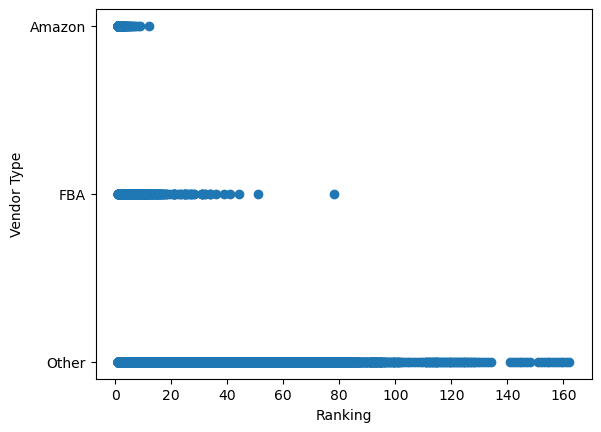

In [15]:
# First let's see a scatter plot of all rankings by vendor type.

plt.scatter(df['Ranking'], df['Ranked_Vendor_Type'])
plt.xlabel('Ranking')
plt.ylabel('Vendor Type')
plt.show()

#### This scatter plot shows us the overall rankings by vendor type. Amazon always ranked in the top 20 and FBA always ranked in the top 50 with a couple of outliers. 

In [16]:
# Group by Ranked_Vendor_Type and the sum of Ranking. This will give us the total number one rankings achieved by each vendor type.
ranked_vendors = ranked_one.groupby(['Ranked_Vendor_Type'])['Ranking'].sum().reset_index()

# Rename the Ranking column to Ranked1_Count.
ranked_vendors = ranked_vendors.rename(columns={'Ranking':'Ranked1_Count'})
ranked_vendors

,Ranked_Vendor_Type,Ranked1_Count
0,Amazon,132
1,FBA,24
2,Other,85


#### Out of the 241 different products, Amazon achieved a number one ranking for 132 products, FBA achieved a number one ranking for 24 products, and Other received a number one ranking for 85 products.

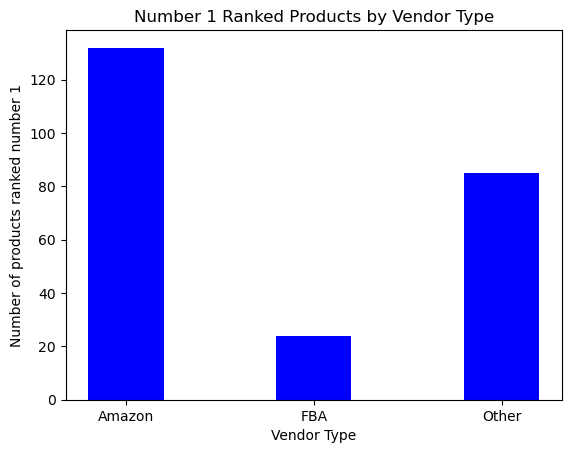

In [17]:
# Let's see this in a bar graph.
plt.bar(ranked_vendors['Ranked_Vendor_Type'], ranked_vendors['Ranked1_Count'], color ='blue',
        width = 0.4,)
 
plt.xlabel("Vendor Type")
plt.ylabel("Number of products ranked number 1")
plt.title("Number 1 Ranked Products by Vendor Type")
plt.show()

## `How many buy boxes were won by each vendor type?` 

In [18]:
# Group by Buy_Box_Vendor_Type and the sum of Ranking.
bb_vendors = ranked_one.groupby(['Buy_Box_Vendor_Type'])['Ranking'].sum().reset_index()

# Rename the Ranking column to Buy_Box_Count.
bb_vendors = bb_vendors.rename(columns={'Ranking':'Buy_Box_Count'})
bb_vendors

,Buy_Box_Vendor_Type,Buy_Box_Count
0,Amazon,180
1,FBA,34
2,Other,27


#### Out of the 241 products, Amazon won the buy box for 180 products, FBA vendors won the buy box for 34 products, and Other vendors won the buy box for the remaining 27 products.

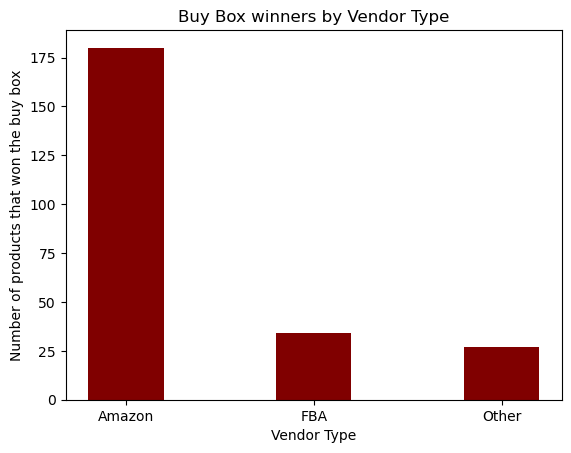

In [19]:
# Let's see this in a bar graph.
plt.bar(bb_vendors['Buy_Box_Vendor_Type'], bb_vendors['Buy_Box_Count'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Vendor Type")
plt.ylabel("Number of products that won the buy box")
plt.title("Buy Box winners by Vendor Type")
plt.show()

## `Compare the number of products ranked number one by vendor type to the number of buy boxes won by vendor type.`

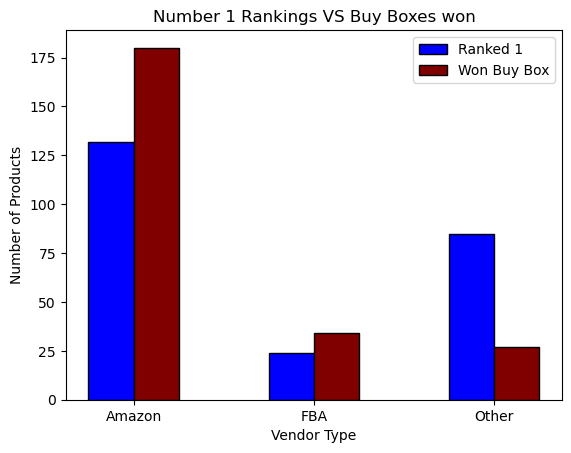

In [73]:
# plot both the number 1 ranked bar graph and the buy box winner bar graph in one graph

n=3    # number of x-axis variables (vendor types) 
r = np.arange(n)    # is used to create a range of values 
width = 0.25    # width of the bars
  
# bar plot for number 1 ranked  
plt.bar(r, ranked_vendors['Ranked1_Count'], color = 'blue',
        width = width, edgecolor = 'black',
        label='Ranked 1')

# bar plot for buy box winners
plt.bar(r + width, bb_vendors['Buy_Box_Count'], color = 'maroon',
        width = width, edgecolor = 'black',
        label='Won Buy Box')

# graph labels
plt.xlabel("Vendor Type")
plt.ylabel("Number of Products")
plt.title("Number 1 Rankings VS Buy Boxes won")
plt.xticks(r + width/2,['Amazon','FBA','Other'])
plt.legend()
plt.show()

#### Vendor type Amazon was ranked number one for 132 products but they won the buy box for 180 products. 
    - Amazon won the buy box more times than they ranked number 1. They won the buy box for about 36% more products than 
    they ranked number 1 for. 
#### Vendor type FBA was ranked number one for 24 products but they won the buy box for 34 products. 
    - FBA vendors won the buy box more times than they ranked number 1. They won the buy box for about 42% more products 
    than they ranked number 1 for.
#### Vendor type Other was ranked number one for 85 products but they won the buy box for only 27 products.
    - Other vendors won the buy box less times than they ranked number 1. They won the buy box for about 68% less products 
    than they ranked number 1 for. The majority of the products that an Other vendor type ranked number one for, did not 
    win the buy box.

## `For how many products did the Other vendor type win the buy box when there was an Amazon or FBA vendor selling the same product?`

In [21]:
# Create a dataframe with only the rows where the Buy_Box_Vendor_Type is Other.
bb_other = df.loc[df['Buy_Box_Vendor_Type'] == 'Other']
bb_other.head()

,Product_Name,Ranking,Price,Ranked_Vendor,Ranked_Vendor_Type,Buy_Box_Vendor_Type,Buy_Box_Vendor
21,3 Pair Motorcycle Riding Glasses Smoke Clear Y...,1,6.79,Happy DRH,Other,Other,Ships from and sold by Happy DRH.
22,3 Pair Motorcycle Riding Glasses Smoke Clear Y...,4,8.97,MODA Eyewear,Other,Other,Ships from and sold by Happy DRH.
23,3 Pair Motorcycle Riding Glasses Smoke Clear Y...,5,12.48,MyLux Connection,Other,Other,Ships from and sold by Happy DRH.
24,3 Pair Motorcycle Riding Glasses Smoke Clear Y...,6,13.89,OnlineWelcome,Other,Other,Ships from and sold by Happy DRH.
25,3 Pair Motorcycle Riding Glasses Smoke Clear Y...,8,14.68,VeryHobby,Other,Other,Ships from and sold by Happy DRH.


In [22]:
# Group by Product_Name and Ranked_Vendor_Type and count the Ranked_Vendor to see how many of each vendor type are selling each product from this dataframe.
fba_amazon_lost = bb_other.groupby(['Product_Name', 'Ranked_Vendor_Type'])['Ranked_Vendor'].count().reset_index()
fba_amazon_lost

,Product_Name,Ranked_Vendor_Type,Ranked_Vendor
0,3 Pair Motorcycle Riding Glasses Smoke Clear Y...,FBA,3
1,3 Pair Motorcycle Riding Glasses Smoke Clear Y...,Other,6
2,3/4 gal Talstar Pro / One Multi Use Pest Contr...,FBA,1
3,3/4 gal Talstar Pro / One Multi Use Pest Contr...,Other,14
4,Accutire MS-4021B Digital Tire Pressure Gauge,Amazon,1
5,Accutire MS-4021B Digital Tire Pressure Gauge,Other,13
6,Apple 5W USB Wall Charger Power Adapter with 1...,Other,21
7,Bushnell Marine 7x50 Binocular,Other,46
8,Canon PowerShot ELPH 170 IS (Blue),Amazon,1
9,Canon PowerShot ELPH 170 IS (Blue),Other,5


In [23]:
# Drop all rows with Other vendor type to see how many of these products had an Amazon or FBA vendor type.
fba_amazon_lost = fba_amazon_lost[fba_amazon_lost.Ranked_Vendor_Type != 'Other']
fba_amazon_lost

,Product_Name,Ranked_Vendor_Type,Ranked_Vendor
0,3 Pair Motorcycle Riding Glasses Smoke Clear Y...,FBA,3
2,3/4 gal Talstar Pro / One Multi Use Pest Contr...,FBA,1
4,Accutire MS-4021B Digital Tire Pressure Gauge,Amazon,1
8,Canon PowerShot ELPH 170 IS (Blue),Amazon,1
10,Celestron 71404 TrailSeeker 8x42 Binoculars (A...,Amazon,1
12,GOOACC 8mm 40 Pcs / Pack Nylon Bumper Retainer...,FBA,12
14,Gazillion 67.6 ounces Bubble Solution,FBA,11
16,Generic Magic Cleaning Eraser Sponge Melamine ...,FBA,4
19,"Kalencom Potette Plus Liners, 30 count",FBA,2
26,Nikon COOLPIX S33 Waterproof Digital Camera (B...,Amazon,1


In [24]:
# Count how many products are sold by Amazon and FBA vendors from this dataframe.
fba_amazon_lost['Product_Name'].nunique()

13

#### There were 27 products in total where an Other vendor type won the buy box. Out of those 27, the Other vendor type won the buy box for only 13 of those products when there was an Amazon or FBA vendor selling the same product. 
#### The Other vendor type won the buy box for 14 of the products just through default because there were no other Amazon or FBA vendors selling the same product. 
#### For the majority of the products where an Other vendor type won the buy box it was only because Amazon or FBA vendors did not sell that same product.

## `For how many products did Amazon win the buy box when they were ranked number 1 for that product?`

In [25]:
# Create a data frame with only the number one ranked Amazon vendor type.
amazon_ranked_one = ranked_one.loc[ranked_one['Ranked_Vendor_Type']=='Amazon']

# Check the shape to see how many rows there are.
amazon_ranked_one.shape

(132, 7)

Amazon was ranked number one for 132 products. 

In [26]:
# Check to see for how many of these same 132 products did they also win the buy box.
amazon_one_bb = amazon_ranked_one.loc[amazon_ranked_one['Ranked_Vendor_Type']==amazon_ranked_one['Buy_Box_Vendor_Type']]

# Check the shape to see how many rows with Amazon as the Ranked_Vendor_Type also had Amazon as the Buy_Box_Vendor_Type.
amazon_one_bb.shape

(129, 7)

#### Out of the 132 products for which Amazon was ranked number one, they won the buy box for 129 of those products. Amazon won the buy box for 98% of their products that were ranked number one.

In [27]:
# Check to see which vendor type won the buy box for the 3 products where Amazon was ranked number one but did not win the buy box.
amazon_one_notbb = amazon_ranked_one.loc[amazon_ranked_one['Ranked_Vendor_Type']!=amazon_ranked_one['Buy_Box_Vendor_Type']]
amazon_one_notbb

,Product_Name,Ranking,Price,Ranked_Vendor,Ranked_Vendor_Type,Buy_Box_Vendor_Type,Buy_Box_Vendor
3037,"Green Mountain Coffee Caramel Vanilla Cream, K...",1,13.32,Amazon.com,Amazon,FBA,Sold by Deals On Call and Fulfilled by Amazon.
5894,Samsung EP-TA20JWE/ECB-DU4EWE Adaptive Fast Ch...,1,8.85,Amazon.com,Amazon,FBA,Sold by Accessorie pro's and Fulfilled by Amazon.
6281,Sony MDRZ7 Hi-Res Stereo Headphones,1,698.00,Amazon.com,Amazon,FBA,Sold by WORLD WIDE STEREO and Fulfilled by Ama...


#### FBA vendors won the buy box for all 3 products where Amazon ranked number 1 but did not win the buy box.

## `For how many products did an FBA vendor win the buy box when they were ranked number 1 for that product?`

In [28]:
# Create a data frame with only the number one ranked FBA vendor type.
fba_ranked_one = ranked_one.loc[ranked_one['Ranked_Vendor_Type']=='FBA']

# Check the shape to see how many rows there are.
fba_ranked_one.shape

(24, 7)

FBA vendors were ranked number one for 24 products. 

In [29]:
# Check to see for how many of these same 24 products did they also win the buy box.
fba_one_bb = fba_ranked_one.loc[fba_ranked_one['Ranked_Vendor_Type']==fba_ranked_one['Buy_Box_Vendor_Type']]

# Check the shape to see how many rows with FBA as the Ranked_Vendor_Type also had FBA as the Buy_Box_Vendor_Type.
fba_one_bb.shape

(20, 7)

#### Out of the 24 products where an FBA vendor was ranked number one, they won the buy box for 20 of those products. FBA vendors won the buy box for 83% of their products that were ranked number 1.

In [30]:
# Check to see which vendor type won the buy box for the 4 products where FBA was ranked number one but did not win the buy box.
fba_one_notbb = fba_ranked_one.loc[fba_ranked_one['Ranked_Vendor_Type']!=fba_ranked_one['Buy_Box_Vendor_Type']]
fba_one_notbb

,Product_Name,Ranking,Price,Ranked_Vendor,Ranked_Vendor_Type,Buy_Box_Vendor_Type,Buy_Box_Vendor
1759,Crest 3D White Whitestrips Professional Effect...,1,36.49,iMarkets,FBA,Amazon,Ships from and sold by Amazon.com.
2089,"Dynarex Disposable Underpad, 17 inches X 24 in...",1,11.90,Debvid Enterprises,FBA,Amazon,Ships from and sold by Amazon.com.
4952,Nikon COOLPIX S33 Waterproof Digital Camera (B...,1,146.95,Electronic Express,FBA,Other,Ships from and sold by Beach Camera Same Day S...
5310,"Pepperell Craft Making Assorted Pom Poms, Stan...",1,9.75,World Weidner - Machine Embroidery Supplies,FBA,Amazon,Ships from and sold by Amazon.com.


#### Out of the 4 products where the FBA vendor ranked number 1 but did not win the buy box, Amazon themselves won the buy box for 3 of the products and an Other vendor won the buy box for the remaining 1 product. Amazon won the buy box for 75% of the products where an FBA vendor ranked number one without winning the buy box. An Other vendor won the buy box for 25% of the products where an FBA vendor ranked number one without winning the buy box. 

## `For how many products did an Other vendor win the buy box when they were ranked number 1 for that product?`

In [31]:
# Create a data frame with only the number one ranked Other vendor type.
other_ranked_one = ranked_one.loc[ranked_one['Ranked_Vendor_Type']=='Other']

# Check the shape to see how many rows there are.
other_ranked_one.shape

(85, 7)

Other vendors were ranked number 1 for 85 products.

In [32]:
# Other vendors were ranked number one 85 times. Check to see how many of these same 85 times did they also win the buy box.
other_one_bb = other_ranked_one.loc[other_ranked_one['Ranked_Vendor_Type']==other_ranked_one['Buy_Box_Vendor_Type']]

# Check the shape to see how many rows with FBA as the Ranked_Vendor_Type also had FBA as the Buy_Box_Vendor_Type.
other_one_bb.shape

(26, 7)

#### Out of the 85 products where an Other vendor was ranked number one, they won the buy box for only 26 of those products. Other vendors only won the buy box for 31% of their products that were ranked number 1.

In [33]:
# Check to see which vendor type won the buy box for the 59 products where an Other vendor was ranked number one but did not win the buy box.
other_one_notbb = other_ranked_one.loc[other_ranked_one['Ranked_Vendor_Type']!=other_ranked_one['Buy_Box_Vendor_Type']]
other_one_notbb['Buy_Box_Vendor_Type'].value_counts()

Amazon    48
FBA       11
Name: Buy_Box_Vendor_Type, dtype: int64

#### Out of the 59 products where an Other vendor ranked number one but did not win the buy box, Amazon won the buy box for 48 of those products and FBA vendors won the buy box for the remaining 11 products. Amazon won the buy box for 81% of the products where an Other vendor ranked number one but did not win the buy box. FBA vendors won the buy box for 19% of the products where on Other vendor ranked number one but did not win the buy box.

## FBA vendors have a higher chance to win the buy box when they are ranked number one than Other vendors have when the Other vendor is ranked number 1.

## `For how many products did an FBA vendor type win the buy box without ranking number 1?`

In [34]:
# dataframe with only FBA Buy_Box_Vendor_Type
bb_fba = df.loc[df['Buy_Box_Vendor_Type'] == 'FBA']
bb_fba.head()

,Product_Name,Ranking,Price,Ranked_Vendor,Ranked_Vendor_Type,Buy_Box_Vendor_Type,Buy_Box_Vendor
0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2,20.99,Supplement Warriors,Other,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.
1,#1 BEST Probiotic Supplement - 60 Day Supply w...,1,19.99,Sharp Nutrition,FBA,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.
2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",1,3.96,speedy tests,Other,FBA,Sold by Michael Minyety and Fulfilled by Amazon.
3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2,3.96,Drug Abuse Control,Other,FBA,Sold by Michael Minyety and Fulfilled by Amazon.
4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",3,3.96,Lowest Priced Tests,Other,FBA,Sold by Michael Minyety and Fulfilled by Amazon.


In [35]:
# only keep the rows where Ranking equals 1. 
bb_fba = bb_fba[bb_fba.Ranking == 1]
bb_fba.head()

,Product_Name,Ranking,Price,Ranked_Vendor,Ranked_Vendor_Type,Buy_Box_Vendor_Type,Buy_Box_Vendor
1,#1 BEST Probiotic Supplement - 60 Day Supply w...,1,19.99,Sharp Nutrition,FBA,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.
2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",1,3.96,speedy tests,Other,FBA,Sold by Michael Minyety and Fulfilled by Amazon.
686,ArtNaturals Enhanced Vitamin C Serum with Hyal...,1,10.95,Art Naturals,FBA,FBA,Sold by Art Naturals and Fulfilled by Amazon.
724,Authentic SSOCC Replacement Coil 0.5ohm 5pc/pack,1,7.98,glacierparkway,Other,FBA,Sold by LuckyLuckyLucky and Fulfilled by Amazon.
732,BEST VITAMIN C Serum for Face - 2 fl. oz - 20%...,1,14.95,Radha Beauty Products,FBA,FBA,Sold by Radha Beauty Products and Fulfilled by...


In [36]:
# drop all rows with FBA in the Ranked_Vendor_Type column to see how many times FBA won the buy box without ranking number 1
bb_fba = bb_fba[bb_fba.Ranked_Vendor_Type != 'FBA']
bb_fba.shape

(14, 7)

### The FBA vendor type won the buy box for a total of 34 products. Out of those 34 products, 14 of the products were not even ranked number one. For 41% of the products where an FBA vendor won the buy box, they were not the number one ranked vendor. 

## `For how many products did an Other vendor type win the buy box without ranking number 1?`

In [37]:
# Use the bb_other dataframe for all buy boxes won by an Other vendor. Only keep the rows where Ranking equals 1. 
bb_other = bb_other[bb_other.Ranking == 1]
bb_other.head()

,Product_Name,Ranking,Price,Ranked_Vendor,Ranked_Vendor_Type,Buy_Box_Vendor_Type,Buy_Box_Vendor
21,3 Pair Motorcycle Riding Glasses Smoke Clear Y...,1,6.79,Happy DRH,Other,Other,Ships from and sold by Happy DRH.
30,3/4 gal Talstar Pro / One Multi Use Pest Contr...,1,41.35,Solutions Pest & Lawn,Other,Other,Ships from and sold by Solutions Pest & Lawn.
429,Accutire MS-4021B Digital Tire Pressure Gauge,1,13.59,Adams Brown Company,Other,Other,Ships from and sold by Adams Brown Company.
602,Apple 5W USB Wall Charger Power Adapter with 1...,1,7.14,No Quarter Arcade,Other,Other,Ships from and sold by Cell Emporium.
1321,Bushnell Marine 7x50 Binocular,1,163.15,TheUltimateWarehouse7175,Other,Other,Ships from and sold by PORTABLE GUY.


In [38]:
# Drop all rows with Other in the Ranked_Vendor_Type column to see how many times Other won the buy box without ranking number 1.
bb_other = bb_other[bb_other.Ranked_Vendor_Type != 'Other']
bb_other

,Product_Name,Ranking,Price,Ranked_Vendor,Ranked_Vendor_Type,Buy_Box_Vendor_Type,Buy_Box_Vendor
4952,Nikon COOLPIX S33 Waterproof Digital Camera (B...,1,146.95,Electronic Express,FBA,Other,Ships from and sold by Beach Camera Same Day S...


### The Other vendor type won the buy box for a total of 27 products. Out of those 27 products, only 1 product was not ranked number 1. For only 4% of the products where an Other vendor won the buy box, they were not the number 1 ranked vendor.

## `For how many products did the number 1 ranked vendor win the buy box overall?`

In [39]:
# use the dataframe ranked_one to get all number 1 ranked products
ranked_one.head()

,Product_Name,Ranking,Price,Ranked_Vendor,Ranked_Vendor_Type,Buy_Box_Vendor_Type,Buy_Box_Vendor
1,#1 BEST Probiotic Supplement - 60 Day Supply w...,1,19.99,Sharp Nutrition,FBA,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.
2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",1,3.96,speedy tests,Other,FBA,Sold by Michael Minyety and Fulfilled by Amazon.
21,3 Pair Motorcycle Riding Glasses Smoke Clear Y...,1,6.79,Happy DRH,Other,Other,Ships from and sold by Happy DRH.
30,3/4 gal Talstar Pro / One Multi Use Pest Contr...,1,41.35,Solutions Pest & Lawn,Other,Other,Ships from and sold by Solutions Pest & Lawn.
49,"303 (30306) Protectant Trigger Sprayer, 32 fl. Oz",1,16.93,Amazon.com,Amazon,Amazon,Ships from and sold by Amazon.com.


In [40]:
# Check how many rows are in ranked_one to make sure we have all 241 different products.
ranked_one.shape

(241, 7)

In [41]:
# Select the rows where the Ranked_Vendor_Type matches the Buy_Box_Vendor_Type. 
ranked_one_bb = ranked_one.loc[ranked_one['Ranked_Vendor_Type']==ranked_one['Buy_Box_Vendor_Type']]
ranked_one_bb.head()

,Product_Name,Ranking,Price,Ranked_Vendor,Ranked_Vendor_Type,Buy_Box_Vendor_Type,Buy_Box_Vendor
1,#1 BEST Probiotic Supplement - 60 Day Supply w...,1,19.99,Sharp Nutrition,FBA,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.
21,3 Pair Motorcycle Riding Glasses Smoke Clear Y...,1,6.79,Happy DRH,Other,Other,Ships from and sold by Happy DRH.
30,3/4 gal Talstar Pro / One Multi Use Pest Contr...,1,41.35,Solutions Pest & Lawn,Other,Other,Ships from and sold by Solutions Pest & Lawn.
49,"303 (30306) Protectant Trigger Sprayer, 32 fl. Oz",1,16.93,Amazon.com,Amazon,Amazon,Ships from and sold by Amazon.com.
94,"303 (30606) Fabric Guard Trigger Sprayer, 32 f...",1,18.64,Amazon.com,Amazon,Amazon,Ships from and sold by Amazon.com.


In [42]:
# Check the shape to see how many rows there are now. 
ranked_one_bb.shape

(175, 7)

#### Overall, out of the 241 products, 175 of them had the same vendor rank number one and win the buy box. For 73% of the products, the vendor that was ranked number 1 also won the buy box.
    
    - Amazon won the buy box for 98% of the products that they were ranked number 1 for. Higher than the overall.
    - FBA vendors won the buy box for 83% of the products that they were ranked number 1 for. Higher than the overall.
    - Other vendors won the buy box for only 31% of the products that they were ranked number 1 for. Significantly less than the overall.

### From our data analysis we can see that out of the 3 vendor types,  Amazon gives itself the highest chance to win the buy box and gives FBA vendors the second best chance to win the buy box. This is confirmation that FBA vendors have a much better chance to win the buy box over Other vendors.

# I will train a logistic regression model and a random forest model to predict which vendor type will win the buy box based on the number one ranked vendor and if an FBA vendor is also selling that same product.

## `Prepare a dataframe to use for the machine learning models:`

In [43]:
# create a dataframe with all the number one ranked product listings. groupby the ProductName and the min of Ranking to get all number 1 ranked listings.
lowest_price_wranking = df.groupby(['Product_Name'])['Ranked_Vendor_Type', 'Buy_Box_Vendor_Type', 'Price', 'Ranking'].min().reset_index()
lowest_price_wranking

,Product_Name,Ranked_Vendor_Type,Buy_Box_Vendor_Type,Price,Ranking
0,#1 BEST Probiotic Supplement - 60 Day Supply w...,FBA,FBA,19.99,1
1,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",FBA,FBA,3.96,1
2,3 Pair Motorcycle Riding Glasses Smoke Clear Y...,FBA,Other,6.79,1
3,3/4 gal Talstar Pro / One Multi Use Pest Contr...,FBA,Other,41.35,1
4,"303 (30306) Protectant Trigger Sprayer, 32 fl. Oz",Amazon,Amazon,16.93,1
...,...,...,...,...,...
236,"Wunderbrow Eyebrow Make Up, Brunette",Amazon,Amazon,22.00,1
237,"XL Watercolor Pad, 9""X12"" Fold Over",Amazon,Amazon,9.99,1
238,Zymox Otic Pet Ear Treatment with Hydrocortisone,Amazon,Amazon,13.95,1
239,"iPhone 6S Screen Protector, Maxboost Tempered ...",FBA,FBA,7.98,1


### First, confirm if the lowest priced item is also the number one ranked item:

In [44]:
# groupby the Product_Name and the min of the Price
lowest_price = df.groupby(['Product_Name'])['Price'].min().reset_index()

In [45]:
# confirm if all the rows in the lowest_price['Price'] column is equal to all the rows in the lowest_price_wranking['Price'] column
price_compare = lowest_price_wranking['Price'] == lowest_price['Price']
price_compare.value_counts()

True    241
Name: Price, dtype: int64

We can see that there are still 241 rows and all the rows match in both dataframes.

In [46]:
# confirm if only number 1 ranked listings were in the lowest_price_wranking dataframe
lowest_price_wranking['Ranking'].value_counts()

1    241
Name: Ranking, dtype: int64

We can see that there are still 241 rows and all the rows are number 1 ranked items.

#### We have confirmed that the lowest priced item is also the number one ranked item. 

### For each product, check if FBA and Other vendor types sell that product:

In [48]:
# create a function to see if each vendor type sells the given product.
def check_value(group, value_to_check):
    return value_to_check in group.values

# check to see if there are any FBA sellers for each product. 
fba_seller = df.groupby('Product_Name').apply(lambda group: check_value(group['Ranked_Vendor_Type'], 'FBA')).reset_index()
fba_seller = fba_seller.rename(columns={0:'FBA_Seller'})
fba_seller

,Product_Name,FBA_Seller
0,#1 BEST Probiotic Supplement - 60 Day Supply w...,True
1,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",True
2,3 Pair Motorcycle Riding Glasses Smoke Clear Y...,True
3,3/4 gal Talstar Pro / One Multi Use Pest Contr...,True
4,"303 (30306) Protectant Trigger Sprayer, 32 fl. Oz",True
...,...,...
236,"Wunderbrow Eyebrow Make Up, Brunette",True
237,"XL Watercolor Pad, 9""X12"" Fold Over",True
238,Zymox Otic Pet Ear Treatment with Hydrocortisone,False
239,"iPhone 6S Screen Protector, Maxboost Tempered ...",True


In [49]:
# check to see if there are any Other sellers for each product. 
other_seller = df.groupby('Product_Name').apply(lambda group: check_value(group['Ranked_Vendor_Type'], 'Other')).reset_index()
other_seller = other_seller.rename(columns={0:'Other_Seller'})
other_seller

,Product_Name,Other_Seller
0,#1 BEST Probiotic Supplement - 60 Day Supply w...,True
1,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",True
2,3 Pair Motorcycle Riding Glasses Smoke Clear Y...,True
3,3/4 gal Talstar Pro / One Multi Use Pest Contr...,True
4,"303 (30306) Protectant Trigger Sprayer, 32 fl. Oz",True
...,...,...
236,"Wunderbrow Eyebrow Make Up, Brunette",True
237,"XL Watercolor Pad, 9""X12"" Fold Over",True
238,Zymox Otic Pet Ear Treatment with Hydrocortisone,True
239,"iPhone 6S Screen Protector, Maxboost Tempered ...",True


In [51]:
# add the FBA_Seller column to the data frame with only number one ranked products.
fba_df = pd.merge(ranked_one, fba_seller, on="Product_Name")
fba_df

,Product_Name,Ranking,Price,Ranked_Vendor,Ranked_Vendor_Type,Buy_Box_Vendor_Type,Buy_Box_Vendor,FBA_Seller
0,#1 BEST Probiotic Supplement - 60 Day Supply w...,1,19.99,Sharp Nutrition,FBA,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,True
1,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",1,3.96,speedy tests,Other,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,True
2,3 Pair Motorcycle Riding Glasses Smoke Clear Y...,1,6.79,Happy DRH,Other,Other,Ships from and sold by Happy DRH.,True
3,3/4 gal Talstar Pro / One Multi Use Pest Contr...,1,41.35,Solutions Pest & Lawn,Other,Other,Ships from and sold by Solutions Pest & Lawn.,True
4,"303 (30306) Protectant Trigger Sprayer, 32 fl. Oz",1,16.93,Amazon.com,Amazon,Amazon,Ships from and sold by Amazon.com.,True
...,...,...,...,...,...,...,...,...
236,"Wunderbrow Eyebrow Make Up, Brunette",1,22.00,Amazon.com,Amazon,Amazon,Ships from and sold by Amazon.com.,True
237,"XL Watercolor Pad, 9""X12"" Fold Over",1,9.99,Amazon.com,Amazon,Amazon,Ships from and sold by Amazon.com.,True
238,Zymox Otic Pet Ear Treatment with Hydrocortisone,1,13.95,Amazon.com,Amazon,Amazon,Ships from and sold by Amazon.com.,False
239,"iPhone 6S Screen Protector, Maxboost Tempered ...",1,7.98,power-innovation,FBA,FBA,Sold by power-innovation and Fulfilled by Amazon.,True


In [52]:
# add the Other_Seller column to the data frame.
other_df = pd.merge(fba_df, other_seller, on="Product_Name")
other_df

,Product_Name,Ranking,Price,Ranked_Vendor,Ranked_Vendor_Type,Buy_Box_Vendor_Type,Buy_Box_Vendor,FBA_Seller,Other_Seller
0,#1 BEST Probiotic Supplement - 60 Day Supply w...,1,19.99,Sharp Nutrition,FBA,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,True,True
1,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",1,3.96,speedy tests,Other,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,True,True
2,3 Pair Motorcycle Riding Glasses Smoke Clear Y...,1,6.79,Happy DRH,Other,Other,Ships from and sold by Happy DRH.,True,True
3,3/4 gal Talstar Pro / One Multi Use Pest Contr...,1,41.35,Solutions Pest & Lawn,Other,Other,Ships from and sold by Solutions Pest & Lawn.,True,True
4,"303 (30306) Protectant Trigger Sprayer, 32 fl. Oz",1,16.93,Amazon.com,Amazon,Amazon,Ships from and sold by Amazon.com.,True,True
...,...,...,...,...,...,...,...,...,...
236,"Wunderbrow Eyebrow Make Up, Brunette",1,22.00,Amazon.com,Amazon,Amazon,Ships from and sold by Amazon.com.,True,True
237,"XL Watercolor Pad, 9""X12"" Fold Over",1,9.99,Amazon.com,Amazon,Amazon,Ships from and sold by Amazon.com.,True,True
238,Zymox Otic Pet Ear Treatment with Hydrocortisone,1,13.95,Amazon.com,Amazon,Amazon,Ships from and sold by Amazon.com.,False,True
239,"iPhone 6S Screen Protector, Maxboost Tempered ...",1,7.98,power-innovation,FBA,FBA,Sold by power-innovation and Fulfilled by Amazon.,True,True


In [54]:
# Remove the columns Product_Name and Price because they are irrelevant for deciding the buy box. 
# I will also remove the Ranking column because all the rows are ranked 1.
amazon_df = other_df.drop(['Product_Name', 'Ranking', 'Price', 'Ranked_Vendor', 'Buy_Box_Vendor'], axis=1)
amazon_df

,Ranked_Vendor_Type,Buy_Box_Vendor_Type,FBA_Seller,Other_Seller
0,FBA,FBA,True,True
1,Other,FBA,True,True
2,Other,Other,True,True
3,Other,Other,True,True
4,Amazon,Amazon,True,True
...,...,...,...,...
236,Amazon,Amazon,True,True
237,Amazon,Amazon,True,True
238,Amazon,Amazon,False,True
239,FBA,FBA,True,True


### I will remove all rows where Amazon was ranked number 1 because there is no opportunity for a 3rd party vendor to get the same benefits as Amazon themselves.

In [55]:
# remove all rows where Amazon was ranked number 1.
amazon_df = amazon_df[amazon_df.Ranked_Vendor_Type != 'Amazon']
amazon_df

,Ranked_Vendor_Type,Buy_Box_Vendor_Type,FBA_Seller,Other_Seller
0,FBA,FBA,True,True
1,Other,FBA,True,True
2,Other,Other,True,True
3,Other,Other,True,True
5,Other,Amazon,False,True
...,...,...,...,...
223,Other,Amazon,True,True
230,FBA,FBA,True,True
233,Other,FBA,True,True
235,FBA,FBA,True,True


In [56]:
# remove all rows where Amazon won the buy box.
amazon_df = amazon_df[amazon_df.Buy_Box_Vendor_Type != 'Amazon']
print(amazon_df.shape)
amazon_df.head()

(58, 4)


,Ranked_Vendor_Type,Buy_Box_Vendor_Type,FBA_Seller,Other_Seller
0,FBA,FBA,True,True
1,Other,FBA,True,True
2,Other,Other,True,True
3,Other,Other,True,True
16,Other,Other,False,True


58 rows is enough to run a logistic regression model. (Must be more than 50)

In [57]:
# get dummies to encode all columns as binaries.
amazon_df = pd.get_dummies(amazon_df, columns=['Ranked_Vendor_Type', 'Buy_Box_Vendor_Type', 'FBA_Seller', 'Other_Seller'])
amazon_df.head()

,Ranked_Vendor_Type_FBA,Ranked_Vendor_Type_Other,Buy_Box_Vendor_Type_FBA,Buy_Box_Vendor_Type_Other,FBA_Seller_False,FBA_Seller_True,Other_Seller_True
0,1,0,1,0,0,1,1
1,0,1,1,0,0,1,1
2,0,1,0,1,0,1,1
3,0,1,0,1,0,1,1
16,0,1,0,1,1,0,1


In [58]:
# drop redundant columns. we can also drop Other_Seller because every row has an Other seller.
amazon_df = amazon_df.drop(['Ranked_Vendor_Type_Other', 'Buy_Box_Vendor_Type_Other', 'FBA_Seller_False', 'Other_Seller_True'], axis=1)

# rename remaining columns
amazon_df = amazon_df.rename(columns={'Ranked_Vendor_Type_FBA':'Ranked_Vendor_Type', 'Buy_Box_Vendor_Type_FBA':'Buy_Box_Vendor_Type',
                                     'FBA_Seller_True':'FBA_Seller'})

amazon_df.head()

,Ranked_Vendor_Type,Buy_Box_Vendor_Type,FBA_Seller
0,1,1,1
1,0,1,1
2,0,0,1
3,0,0,1
16,0,0,0


### Binary encoding key:
#####   `Ranked Vendor Type:`
            FBA = 1
            Other = 0
#####   `Buy Box Vendor Type:`
            FBA = 1
            Other = 0
#####   `FBA Seller:`
            True (There is an FBA vendor for this product) = 1
            False (There is no FBA vendor for this product) = 0


# **The dataframe amazon_df is now ready for machine learning models.** 

## `Logistic Regression Model:`

In [59]:
# import libraries for logistic regression and train/test split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# columns to be used as the features/predictors
feature_cols = ['Ranked_Vendor_Type', 'FBA_Seller']
X = amazon_df[feature_cols]

# column to predict
y = amazon_df.Buy_Box_Vendor_Type

# Split the data in to the training and testing variables. 70% for training and 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=8)

# instantiate a logistic regression model
logreg = LogisticRegression()

# fit the model with the training data
logreg.fit(X_train, y_train)

# make predictions on the testing data and store the results.
y_pred = logreg.predict(X_test)

# score the model based on the testing data
logreg.score(X_test, y_test)

print('The Logistic Regression accuracy score is {}.'.format(logreg.score(X_test, y_test).round(2)))

The Logistic Regression accuracy score is 0.72.


### 58 rows of data meet the minimum requirement to use a logistic regression model, however it is not really much.

In [60]:
# Sample the data to increase the dataframe to 1000 rows of data.
amazon_sampled = amazon_df.sample(n=1000, replace=True)

# Check to see if there are 1000 rows of data now.
amazon_sampled.shape

(1000, 3)

### Let's see if we can improve our logistic regression model with this larger dataset.

In [61]:
# columns to be used as the features/predictors
X = amazon_sampled[feature_cols]

# column to predict
y = amazon_sampled.Buy_Box_Vendor_Type

# Split the data in to the training and testing variables. 70% for training and 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=8)

# instantiate a logistic regression model
logreg = LogisticRegression()

# fit the model with the training data
logreg.fit(X_train, y_train)

# make predictions on the testing data and store the results.
y_pred_sampled = logreg.predict(X_test)

# score the model based on the testing data
logreg.score(X_test, y_test)

print('The Logistic Regression accuracy score using the larger sampled dataframe is {}.'.format(logreg.score(X_test, y_test).round(2)))

The Logistic Regression accuracy score using the larger sampled dataframe is 0.84.


#### We increased our logistic regression model's accuracy from 72% to 84% by using the larger sampled dataframe.

In [63]:
# check the first 10 rows for the probability that the buy box will be an FBA vendor. 
logreg.predict_proba(X_test)[0:10, 1]

array([0.91846638, 0.51915357, 0.51915357, 0.01802778, 0.51915357,
       0.91846638, 0.51915357, 0.01802778, 0.91846638, 0.91846638])

In [64]:
# check the first 10 rows for the true buy box vendor type (1=FBA, 0=Other)  
y_test[0:10]

163    1
175    1
2      0
138    0
181    0
204    1
30     1
171    0
28     1
142    1
Name: Buy_Box_Vendor_Type, dtype: uint8

### Confusion Matrix:

In [65]:
# import libraries to create a confusion matrix 
from sklearn import linear_model, model_selection, metrics

# predict probabilities on the X_test data
logreg_pred_proba = logreg.predict_proba(X_test)[:, 1]

# create a confusion matrix 
cm = metrics.confusion_matrix(y_true=y_test, y_pred=logreg_pred_proba > .5)
cm

array([[101,  47],
       [  0, 152]])

In [74]:
# Get the precision, recall, and f1-score for our predictions
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_sampled))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81       148
           1       0.76      1.00      0.87       152

    accuracy                           0.84       300
   macro avg       0.88      0.84      0.84       300
weighted avg       0.88      0.84      0.84       300



## `Random Forest Model:`

In [68]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# columns to be used as the features/predictors
X = amazon_sampled[feature_cols]

# column to predict
y = amazon_sampled.Buy_Box_Vendor_Type

# Split the data in to the training and testing variables. 70% for training and 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=8)

# instantiate the Random Forest classifier 
rfc = RandomForestClassifier(n_estimators=10, random_state=8)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred_rfc = rfc.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('The Random Forest Model accuracy score with 10 decision-trees is {}.'.format(accuracy_score(y_test, y_pred_rfc).round(2)))

The Random Forest Model accuracy score with 10 decision-trees is 0.84.


#### Let's see if we can improve the accuracy of the Random Forest Model by increasing the decision trees to 100.

In [69]:
# columns to be used as the features/predictors
X = amazon_sampled[feature_cols]

# column to predict
y = amazon_sampled.Buy_Box_Vendor_Type

# Split the data in to the training and testing variables. 70% for training and 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=8)

# instantiate the Random Forest classifier 
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=8)

# fit the model
rfc_100.fit(X_train, y_train)

# Predict the Test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('The Random Forest Model accuracy score with 100 decision-trees is {}.'.format(accuracy_score(y_test, y_pred_100).round(2)))

The Random Forest Model accuracy score with 100 decision-trees is 0.84.


#### The Random Forest Model accuracy did not change when we increased the decision trees. It remained at 0.84.

### Confusion Matrix:

In [70]:
# create confusion matrix:
cm_rfm = metrics.confusion_matrix(y_test, y_pred_100)
cm_rfm

array([[101,  47],
       [  0, 152]])

In [71]:
# Get the precision, recall, and f1-score for our predictions
print(classification_report(y_test, y_pred_100))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81       148
           1       0.76      1.00      0.87       152

    accuracy                           0.84       300
   macro avg       0.88      0.84      0.84       300
weighted avg       0.88      0.84      0.84       300



### Both the Logistic Regression Model and the Random Forest Model had the same accuracy score of 84% and the same confusion matrix.

# `Conclusion:`

#### FBA vendors won the buy box for more product listings than they were ranked number 1 for. They have won the buy box for 83% of the product listings that they were ranked number 1 for. And 41% of the buy boxes they won were for product listings that they were not ranked number 1 for. 
#### Other vendors won the buy box for far fewer products than they were ranked number 1 for. They only won the buy box for 31% of the product listings that they were ranked number 1 for. And only 4% of the buy boxes they won were for product listings that they were not ranked number 1 for. 
#### Amazon gives FBA vendors a much higher chance to win the buy box over Other vendors.
#### The hypothesis is confirmed that 3rd party vendors selling products on Amazon will have a higher chance to win the buy box for their product if they subscribe to the Fulfilled By Amazon (FBA) service.

#### I trained and fit a Logistic Regression Model and a Random Forest Model to predict the buy box vendor type based on the number 1 ranked (lowest priced) vendor type and also if an FBA vendor sells that same product. The dataset was very small (only 58 rows) so I made use of sampling to increase the dataset to 1000 rows. This improved our model's accuracy. Both the Logistic Regression Model and the Random Forest Model had the same accuracy score of 84% and the same confusion matrix results also. My guess is that the performance from both models were the same because we were predicting a binary classification based on only 2 different binary features. There were no features with multiple numeric values in numerical order, which would have required the use of regression and added a little more complexity to the math which would have perhaps made the two different models perform slightly differently.

`Dataset Citing:` https://www.propublica.org/datastore/dataset/amazon-pricing-algorithm-data-set
    